### Loading the cowdata.csv file

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# Read the data
df = pd.read_csv('cowdata.csv', header=None)
df.columns = ['name', 'race', 'age', 'milk', 'character', 'music']
print(df)

names = df['name'].to_numpy()
races = df['race'].to_numpy()
ages = df['age'].to_numpy()
milks = df['milk'].to_numpy()
characters = df['character'].to_numpy()
musics = df['music'].to_numpy()

         name        race  age  milk character      music
0      Clover    Holstein    2    10      calm       rock
1       Sunny    Ayrshire    2    15    lively    country
2        Rose    Holstein    5    20      calm  classical
3       Daisy    Ayrshire    4    25      kind       rock
4  Strawberry  Finncattle    7    35      calm  classical
5       Molly    Ayrshire    8    45      kind    country


(a) In this part, use only numerical features. Scale the features with the
min-max scaling described in the book (Aggarwal section 2.3.3) and calculate pairwise Euclidean distances (L2 norm) between cows. Present
the results as a nearest neighbour graph (as described in Lecture 1 and
Aggarwal Sec. 2.2.2.9). Select the threshold ϵ as small as possible still
keeping the graph connected.

In [3]:
def min_max_scaling(data):
    min_val = np.min(data)
    max_val = np.max(data)
    scaled_arr = (data - min_val) / (max_val - min_val)
    return scaled_arr

scaled_ages = min_max_scaling(ages)
scaled_milks = min_max_scaling(milks)

def create_nearest_neighbor_graph(squared_distances, epsilon):
    n = squared_distances.shape[0]
    G = nx.Graph()
    for i in range(n):
        for j in range(i+1, n):
            if squared_distances[i, j] <= epsilon:
                G.add_edge(i, j, weight=squared_distances[i, j])
    return G

[[0.         0.14285714 0.57587555 0.54294068 1.09756482 1.41421356]
 [0.14285714 0.         0.52000785 0.43902593 1.0104331  1.31707778]
 [0.57587555 0.52000785 0.         0.21951296 0.54294068 0.87189683]
 [0.54294068 0.43902593 0.21951296 0.         0.57587555 0.87805185]
 [1.09756482 1.0104331  0.54294068 0.57587555 0.         0.33077248]
 [1.41421356 1.31707778 0.87189683 0.87805185 0.33077248 0.        ]]


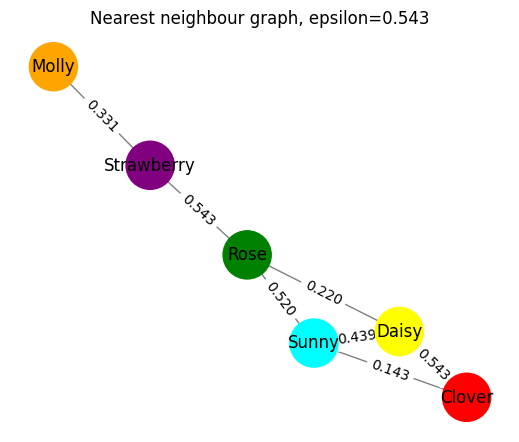

In [4]:
def pairwise_Euclidean(X, Y):
    n = len(X)
    square_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            square_matrix[i, j] = np.sqrt((X[i] - X[j])**2 + (Y[i] - Y[j])**2)
            
    return square_matrix

Euclidean_distances = pairwise_Euclidean(scaled_ages, scaled_milks)
print(Euclidean_distances)
epsilon = 0.543

# Create the nearest neighbor graph
G = create_nearest_neighbor_graph(Euclidean_distances, epsilon)

# visualize the graph
label_dict = {i: name for i, name in enumerate(names)}
colors = ['red', 'cyan', 'green', 'yellow', 'purple', 'orange']
layout = nx.spring_layout(G, k=0.05) 
plt.figure(figsize=(5, 4))  
nx.draw(G, pos=layout, with_labels=True, nodelist=list(label_dict.keys()), labels=label_dict, node_color=colors, edge_color='gray', node_size=1200)
edge_labels = {(i, j): f"{G[i][j]['weight']:.3f}" for i, j in G.edges()}
nx.draw_networkx_edge_labels(G, pos=layout, edge_labels=edge_labels)
plt.title(f"Nearest neighbour graph, epsilon={epsilon}")
plt.show()

(b) In this part, use only categorical features. First, define Goodall distance measure dG from the Goodall similarity measure G with dG = 1 − G. The Goodall similarity measure is presented in Aggarwal sec. 3.2.2 and
the slides of lecture 2 (use that version, since there are many alternative Goodall measures). Then calculate pairwise Goodall distances and present the results as a nearest neighbour graph, once again selecting minimal ϵ such that the graph remains connected.

[[0.15740741 1.         0.4537037  0.7037037  0.75       1.        ]
 [1.         0.12962963 1.         0.75       1.         0.4537037 ]
 [0.4537037  1.         0.15740741 1.         0.4537037  1.        ]
 [0.7037037  0.75       1.         0.15740741 1.         0.4537037 ]
 [0.75       1.         0.4537037  1.         0.12962963 1.        ]
 [1.         0.4537037  1.         0.4537037  1.         0.15740741]]


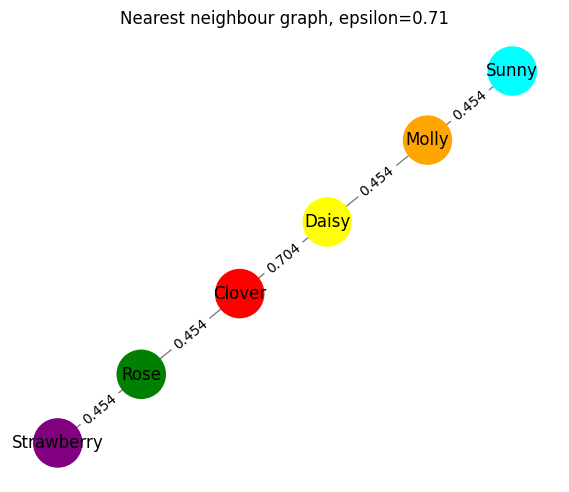

In [5]:
def goodall_similarity(dataList):
    n = len(dataList[0])
    total_similarities_score = np.zeros((n, n))

    for data in dataList:
        # Filter out data into categories
        unique_categories = np.unique(data)
        # Counting the occurence of each category in the array, then divided by n
        fraction_of_records = {category: np.sum(data == category)/n for category in unique_categories}
        #print(fraction_of_records)

        similarity_matrix = np.zeros((n, n))
        for i in range(n):
            for j in range(n):
                if data[i] == data[j]:
                    fraction = fraction_of_records[data[i]]
                    similarity_matrix[i, j] = 1 - fraction**2
        #print(similarity_matrix)
        total_similarities_score += similarity_matrix
    average_similarity_matrix = total_similarities_score/len(dataList)
    return average_similarity_matrix

goodall_similarity_matrix = goodall_similarity([races, characters, musics])
goodall_distances = 1 - goodall_similarity_matrix
#print(goodall_similarity_matrix)
print(goodall_distances)
epsilon = 0.71
# Create the nearest neighbor graph
G = create_nearest_neighbor_graph(goodall_distances, epsilon)

# visualize the graph
label_dict = {i: name for i, name in enumerate(names)}
colors = ['red', 'cyan', 'green', 'yellow', 'purple', 'orange']

layout = nx.spring_layout(G, k=0.05) 
plt.figure(figsize=(5.5, 4.5))  
nx.draw(G, pos=layout, with_labels=True, nodelist=list(label_dict.keys()), labels=label_dict, node_color=colors, edge_color='gray', node_size=1200)

edge_labels = {(i, j): f"{G[i][j]['weight']:.3f}" for i, j in G.edges()}
nx.draw_networkx_edge_labels(G, pos=layout, edge_labels=edge_labels)

plt.title(f"Nearest neighbour graph, epsilon={epsilon}")
plt.show()

(c) In this part, use both numerical and categorical features. Create a distance measure that combines the previous distance measures (L2 and dG) using Equation 3.9 in the book (Aggarwal sec. 3.2.3). (Note that Aggarwal gives similarity measure, but you can combine distance measures in the same manner.) Set λ as the proportion of numerical features. It is recommended to use the unbiased estimate of standard deviation. Create now a nearest neighbour graph using the combined measure and select minimal ϵ that keeps the graph connected.

[[0.29217746 1.98994938 1.38137514 1.81458338 2.41983592 3.18037405]
 [1.98994938 0.24061673 2.3430915  1.80321816 2.80229737 2.07539407]
 [1.38137514 2.3430915  0.29217746 2.06172546 1.35053683 2.67258001]
 [1.81458338 1.80321816 2.06172546 0.29217746 2.39540279 1.66431557]
 [2.41983592 2.80229737 1.35053683 2.39540279 0.24061673 2.16590244]
 [3.18037405 2.07539407 2.67258001 1.66431557 2.16590244 0.29217746]]


NetworkXError: Node 1 has no position.

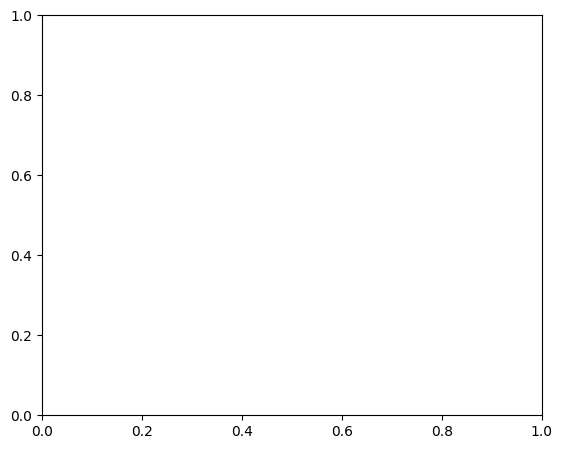

In [11]:
lambda_value = 2/5

weighted_distances = lambda_value * Euclidean_distances/np.std(Euclidean_distances) + (1 - lambda_value) * goodall_distances/np.std(goodall_distances)
print(weighted_distances)
epsilon = 1.5
# Create the nearest neighbor graph
G = create_nearest_neighbor_graph(weighted_distances, epsilon)

# visualize the graph
label_dict = {i: name for i, name in enumerate(names)}
colors = ['red', 'cyan', 'green', 'yellow', 'purple', 'orange']

layout = nx.spring_layout(G, k=0.05) 
plt.figure(figsize=(5, 4))  
nx.draw(G, pos=layout, with_labels=True, nodelist=list(label_dict.keys()), labels=label_dict, node_color=colors, edge_color='gray', node_size=1200)

edge_labels = {(i, j): f"{G[i][j]['weight']:.3f}" for i, j in G.edges()}
nx.draw_networkx_edge_labels(G, pos=layout, edge_labels=edge_labels)

plt.title(f"Nearest neighbour graph, epsilon={epsilon}")
plt.show()

(d) Compare the results. Is the combined measure graph (c) more similar
to the numerical (a) or categorical (b) measure graph? Can you explain
why?

The combined measure graph in (c) is much more similar to the categorical measure graph. Here are the few reasons:

- There are fewer numerical features than categorical features, so the influence of the numerical distances on the combined distance will be reduced.

- There are only a few categories in each categorical variable, which greatly influence the distance when two cows share the same categorical data in any dimension
